In [ ]:
# import libraries
import tensorflow
from tensorflow import keras

In [ ]:
train_images = r"/content/drive/MyDrive/Project-aesthetix"

In [ ]:

## Image Preprocessing using keras


# As we know deep-learning is hungry for data, the data we have is only limited.
# so lets perform **Image Agumentation** to create different versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images.

from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [ ]:
# No transformations are made on the test data
test_gen = ImageDataGenerator()

In [ ]:

# Generating training data
training_data = train_gen.flow_from_directory(
    train_images,
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 200 images belonging to 4 classes.


In [ ]:

# generating test data
testing_data = test_gen.flow_from_directory(
    train_images,
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 200 images belonging to 4 classes.


In [ ]:

# Printing class labels for each face
testing_data.class_indices

{'Anjana': 0, 'Ardramaria': 1, 'Faheem': 2, 'Joyal': 3}

In [ ]:
# training_data have numeric tag for each face
Train_class = training_data.class_indices

In [ ]:

# lets store them in a dictionary with swap for future reference
Result_class = {}
for value_tag, face_tag in zip(Train_class.values(),Train_class.keys()):
    Result_class[value_tag] = face_tag

In [ ]:
# use pickle to save the mapping's
import pickle
with open(r'/content/drive/MyDrive/Project-aesthetix/FaceRecognition.pkl','wb') as Final_mapping:
    pickle.dump(Result_class,Final_mapping)

In [ ]:

print("Mapping of Face and its numeric value",Result_class)

Output_Neurons=len(Result_class) # The Number of output neurons in softmax

Mapping of Face and its numeric value {0: 'Anjana', 1: 'Ardramaria', 2: 'Faheem', 3: 'Joyal'}


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

'''Initializing the Convolutional Neural Network'''
Model = Sequential()

In [ ]:
Model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), input_shape = (100,100,3),activation='relu'))

In [ ]:
Model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
Model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
Model.add(Flatten())

In [ ]:
Model.add(Dense(64,activation='relu'))
Model.add(Dense(Output_Neurons,activation='softmax'))

In [ ]:
Model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['Accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
call = EarlyStopping(
                    min_delta=0.005,
                    patience=5,
                     verbose=1
                    )

In [ ]:
import time
StartTime=time.time()

In [ ]:
Model.fit_generator(training_data,
          epochs = 5,
          validation_data=testing_data,
                   callbacks=call)

Endtime = time.time()
print('Total Training Time taken: ',round((Endtime-StartTime)/60),'Minutes')

<ipython-input-23-e64da11eb794>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Model.fit_generator(training_data,


Epoch 1/5
7/7 [==============================] - 135s 21s/step - loss: 417.6525 - Accuracy: 0.2150 - val_loss: 58.9354 - val_Accuracy: 0.2500
Epoch 2/5
7/7 [==============================] - 70s 11s/step - loss: 32.4125 - Accuracy: 0.3050 - val_loss: 6.4939 - val_Accuracy: 0.3750
Epoch 3/5
7/7 [==============================] - 69s 11s/step - loss: 5.5235 - Accuracy: 0.4050 - val_loss: 4.0940 - val_Accuracy: 0.4800
Epoch 4/5
7/7 [==============================] - 60s 9s/step - loss: 3.3239 - Accuracy: 0.4700 - val_loss: 1.0328 - val_Accuracy: 0.6800
Epoch 5/5
7/7 [==============================] - 58s 9s/step - loss: 1.4972 - Accuracy: 0.5950 - val_loss: 1.2579 - val_Accuracy: 0.6150
Total Training Time taken:  7 Minutes


In [ ]:
import numpy as np
from keras.preprocessing import image
import os
import glob

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

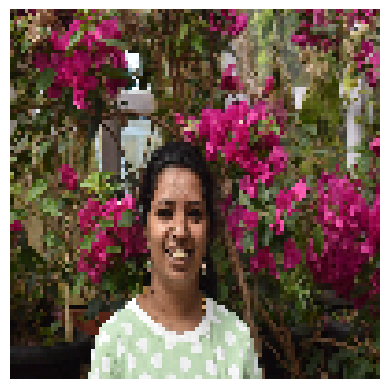

In [ ]:
ImagePath=r"/content/drive/MyDrive/Project-aesthetix/Anjana/DSC_0229.JPG"
test_image=image.load_img(ImagePath,target_size=(100, 100))
test_image=image.img_to_array(test_image)

test_image = image.img_to_array(test_image)

# Display the image
plt.imshow(test_image.astype(int))
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:

test_image=np.expand_dims(test_image,axis=0)

In [ ]:
result=Model.predict(test_image,verbose=0)

In [ ]:
print('####'*10)
print('Prediction is: ',Result_class[np.argmax(result)])

########################################
Prediction is:  Anjana
